## Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.cluster import KMeans

In [2]:
# Set seaborn style for visualizations
sns.set(style="whitegrid")

In [3]:
# Load the data
df = pd.read_csv("Accidents.csv", low_memory=False)
df.head()

,Accident_Index,longitude,latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Local_Authority_(District),...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Date
0,1.0,78.610393,14.724026,1.0,2.0,1.0,1.0,3.0,17:42,12.0,...,1.0,1.0,2.0,2.0,0.0,0.0,1.0,1.0,E01002849,04-01-2018
1,2.0,78.534042,14.762353,1.0,3.0,1.0,1.0,4.0,17:36,12.0,...,5.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002909,05-01-2018
2,3.0,78.470877,14.745606,1.0,3.0,2.0,1.0,5.0,00:15,12.0,...,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002857,06-01-2018
3,4.0,78.557994,14.667128,1.0,3.0,1.0,1.0,6.0,10:35,12.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002840,07-01-2018
4,5.0,78.576431,14.703443,1.0,3.0,1.0,1.0,2.0,21:13,12.0,...,0.0,7.0,1.0,2.0,0.0,0.0,1.0,1.0,E01002863,10-01-2018


In [4]:
# Check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Accident_Index                               59998 non-null  float64
 1   longitude                                    59998 non-null  float64
 2   latitude                                     59998 non-null  float64
 3   Police_Force                                 59998 non-null  float64
 4   Accident_Severity                            59998 non-null  float64
 5   Number_of_Vehicles                           59998 non-null  float64
 6   Number_of_Casualties                         59998 non-null  float64
 7   Day_of_Week                                  59998 non-null  float64
 8   Time                                         59997 non-null  object 
 9   Local_Authority_(District)                   59998 non-null  float64

In [5]:
# missing values
df.isnull().sum().sort_values(ascending=False).head(10)

LSOA_of_Accident_Location                      988674
Time                                           988578
Accident_Index                                 988577
Junction_Control                               988577
Did_Police_Officer_Attend_Scene_of_Accident    988577
Urban_or_Rural_Area                            988577
Carriageway_Hazards                            988577
Special_Conditions_at_Site                     988577
Road_Surface_Conditions                        988577
Weather_Conditions                             988577
dtype: int64

In [6]:
df["Time"].unique()[:10]

array(['17:42', '17:36', '00:15', '10:35', '21:13', '12:40', '20:40',
       '17:35', '22:43', '16:00'], dtype=object)

In [7]:
# Replace missing or invalid values
df["Time"] = df["Time"].fillna("00:00")  # Replace NaN with midnight
df["Time"] = df["Time"].astype(str)      # Ensure it's a string

In [8]:
df["Hour"] = df["Time"].str.split(":").str[0].astype(int)

In [9]:
# Convert 'Date' column to datetime format, with day first if necessary
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

In [10]:
# Now safely extract day of week
df['DayOfWeek'] = df['Date'].dt.day_name()

# Make sure 'Time' is a string, then extract hour
df['Time'] = df['Time'].astype(str)

In [11]:
# Feature Engineering: extract hour and weekday
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
df["Hour"] = df["Time"].str.split(":").str[0].astype(int)
df["DayOfWeek"] = df["Date"].dt.day_name()

C:\Users\hp\AppData\Local\Temp\ipykernel_11668\73820735.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Hour", data=df, palette="viridis")


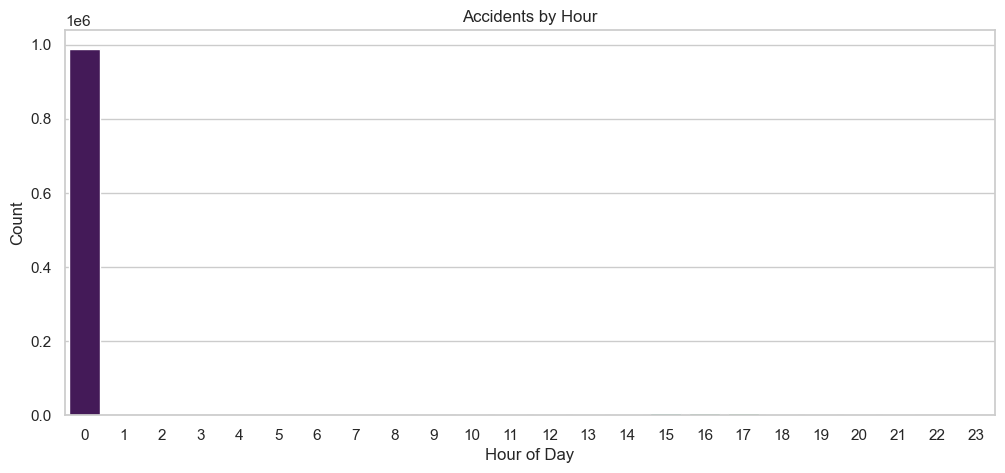

In [12]:
#  Pattern: accidents by hour
plt.figure(figsize=(12,5))
sns.countplot(x="Hour", data=df, palette="viridis")
plt.title("Accidents by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_11668\2048474510.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="DayOfWeek", data=df, order=order, palette="magma")


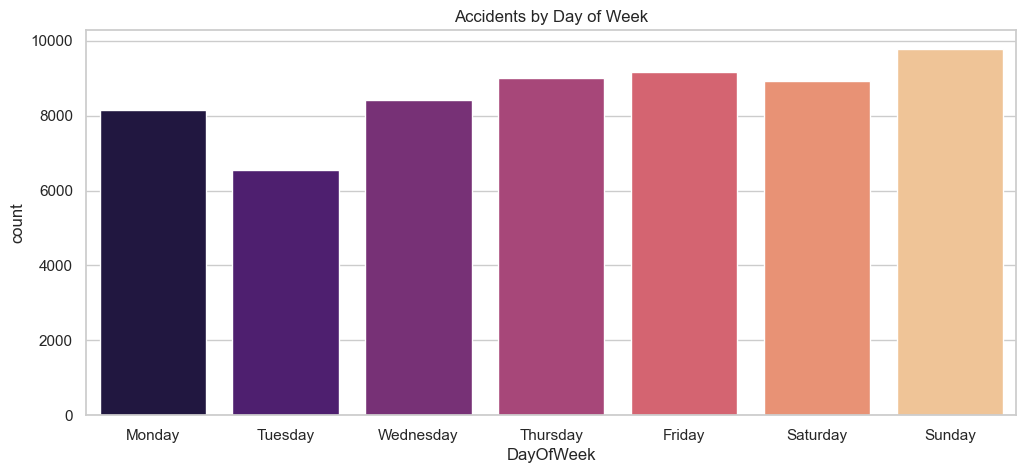

In [13]:
# Pattern: weekday
order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
plt.figure(figsize=(12,5))
sns.countplot(x="DayOfWeek", data=df, order=order, palette="magma")
plt.title("Accidents by Day of Week")
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_11668\3882273660.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Weather_Conditions", data=df, order=df["Weather_Conditions"].value_counts().index[:5], palette="coolwarm")


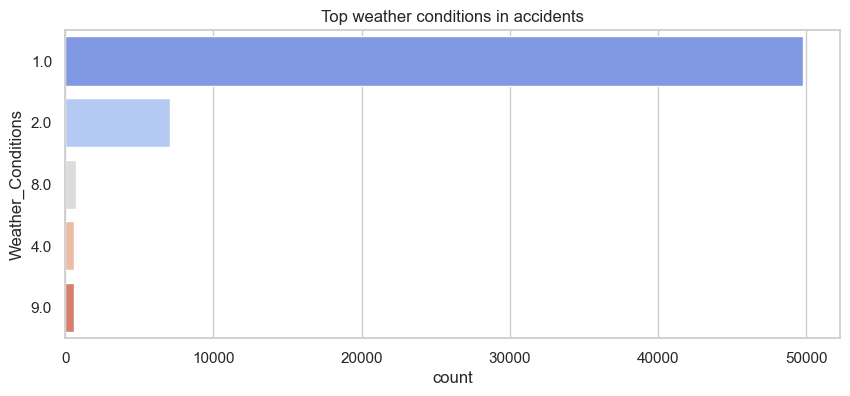

In [14]:
# weather pattern
plt.figure(figsize=(10,4))
sns.countplot(y="Weather_Conditions", data=df, order=df["Weather_Conditions"].value_counts().index[:5], palette="coolwarm")
plt.title("Top weather conditions in accidents")
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_11668\3761790818.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


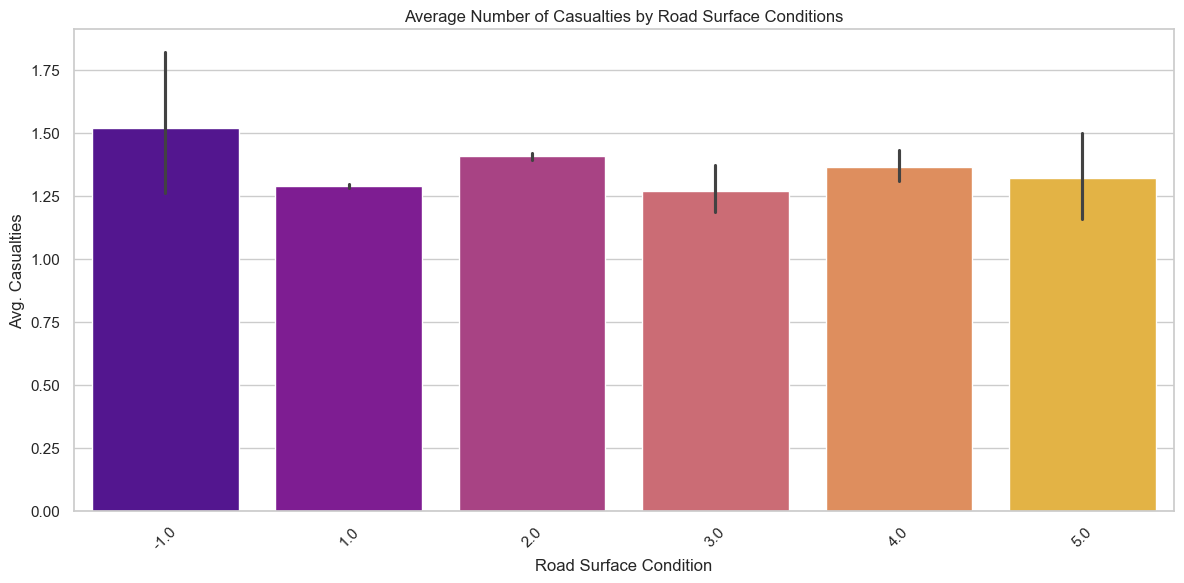

In [15]:
# By road surface conditions
plt.figure(figsize=(12, 6))
sns.barplot(
    x="Road_Surface_Conditions",
    y="Number_of_Casualties",
    data=df,
    estimator=np.mean,
    palette="plasma"
)
plt.title("Average Number of Casualties by Road Surface Conditions")
plt.xticks(rotation=45)
plt.ylabel("Avg. Casualties")
plt.xlabel("Road Surface Condition")
plt.tight_layout()
plt.show()

In [17]:
# Create a pivot table to count accidents by day and hour
heatmap_data = df.pivot_table(
    index="DayOfWeek", 
    columns="Hour", 
    values="Accident_Index", 
    aggfunc="count"
).reindex(index=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

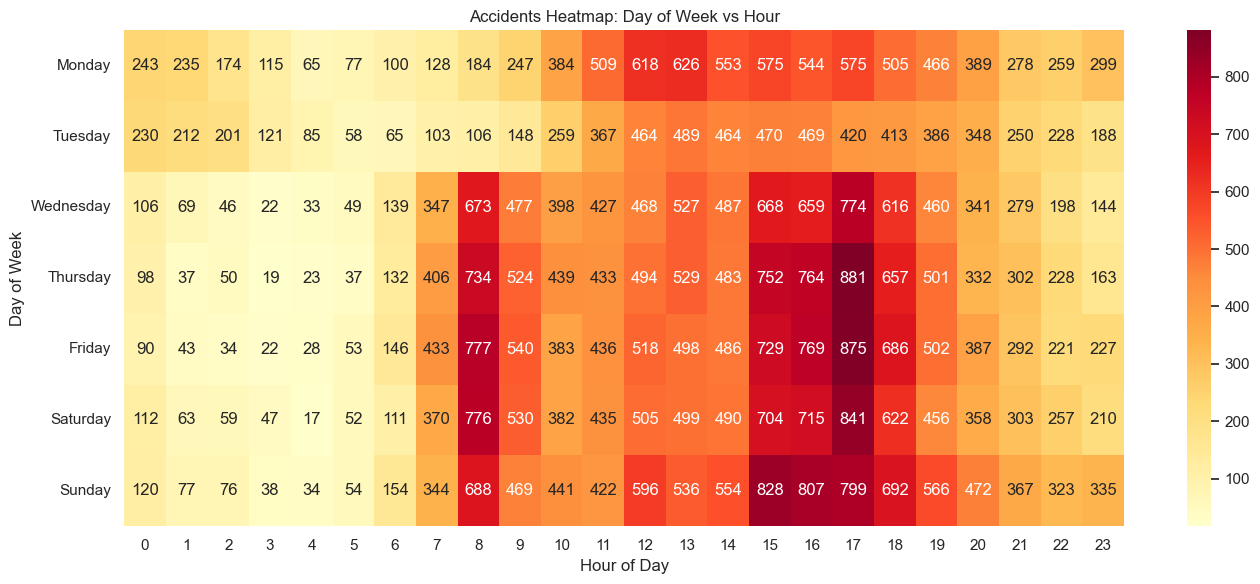

In [18]:
# Plot the heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap="YlOrRd", annot=True, fmt="g")
plt.title("Accidents Heatmap: Day of Week vs Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()

In [21]:
df.columns

Index(['Accident_Index', 'longitude', 'latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Day_of_Week', 'Time', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Date', 'Hour', 'DayOfWeek'],
      dtype='object')

In [22]:
sample_df = df[['latitude', 'longitude']].dropna().sample(n=5000, random_state=42)

In [24]:
import folium
from folium.plugins import HeatMap

# Show column names
print(df.columns)

# Use correct column names based on output
sample_df = df[['latitude', 'longitude']].dropna().sample(n=5000, random_state=42)

# Create map
m = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# Add heatmap
HeatMap(sample_df.values).add_to(m)

# Show map
m

Index(['Accident_Index', 'longitude', 'latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Day_of_Week', 'Time', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Date', 'Hour', 'DayOfWeek'],
      dtype='object')


### Contributing factor Analysis
Now, analyze patterns in the data related to:
Road conditions,
Weather conditions,
Time of day

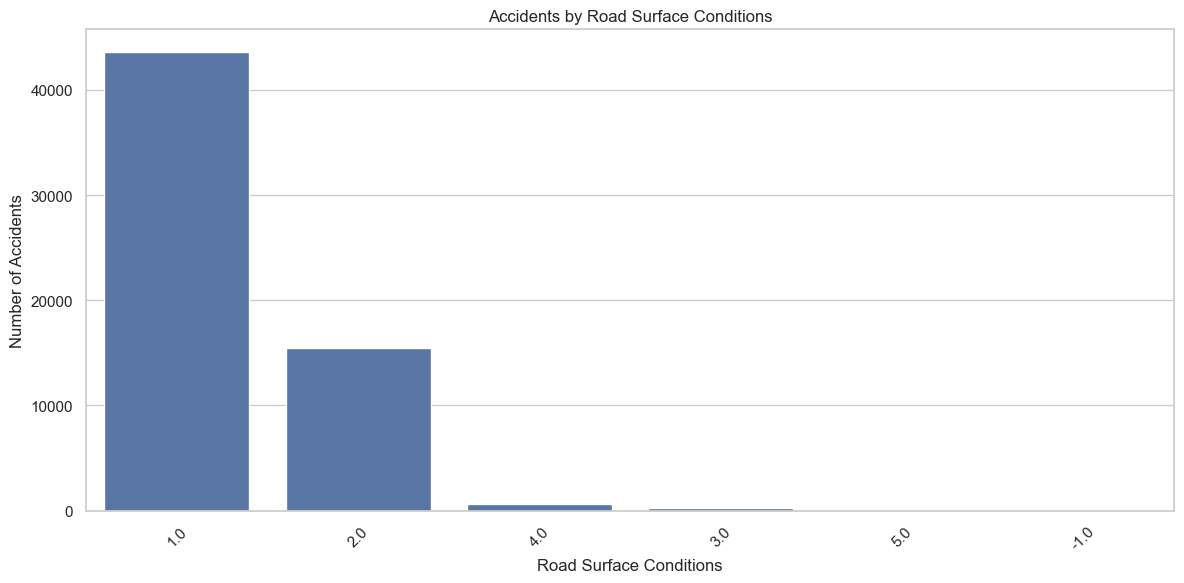

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Road_Surface_Conditions', order=df['Road_Surface_Conditions'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Accidents by Road Surface Conditions')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

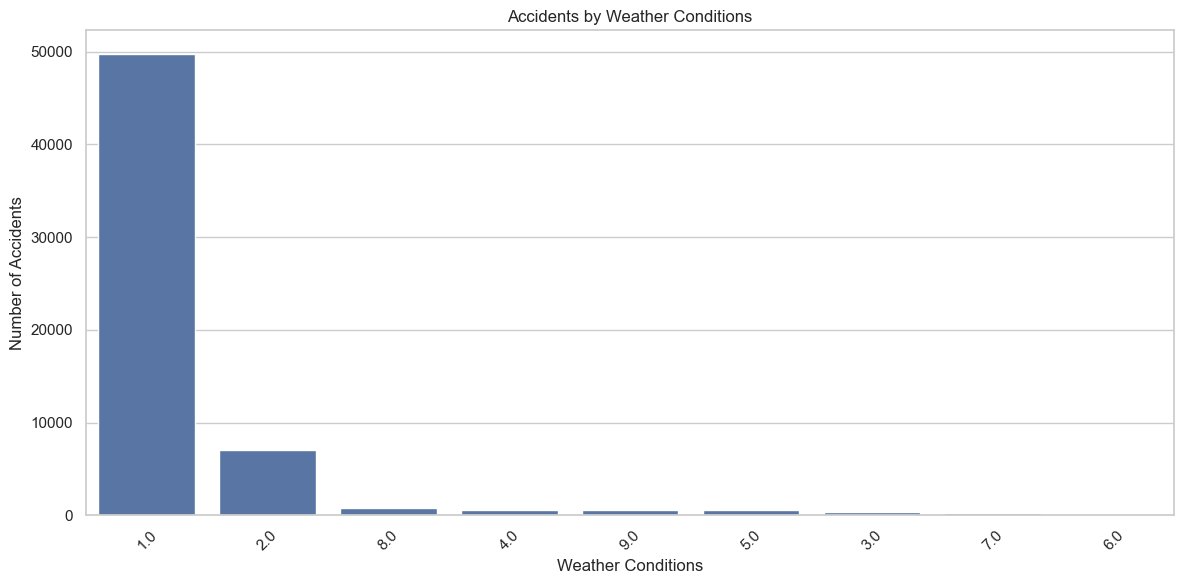

In [27]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Weather_Conditions', order=df['Weather_Conditions'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Accidents by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

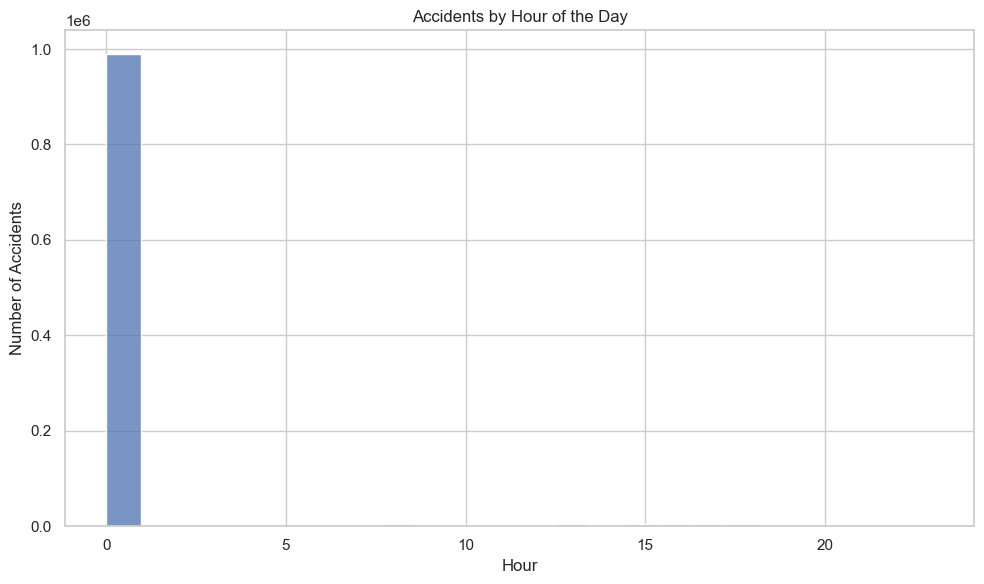

In [28]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Hour', bins=24, kde=False)
plt.title('Accidents by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

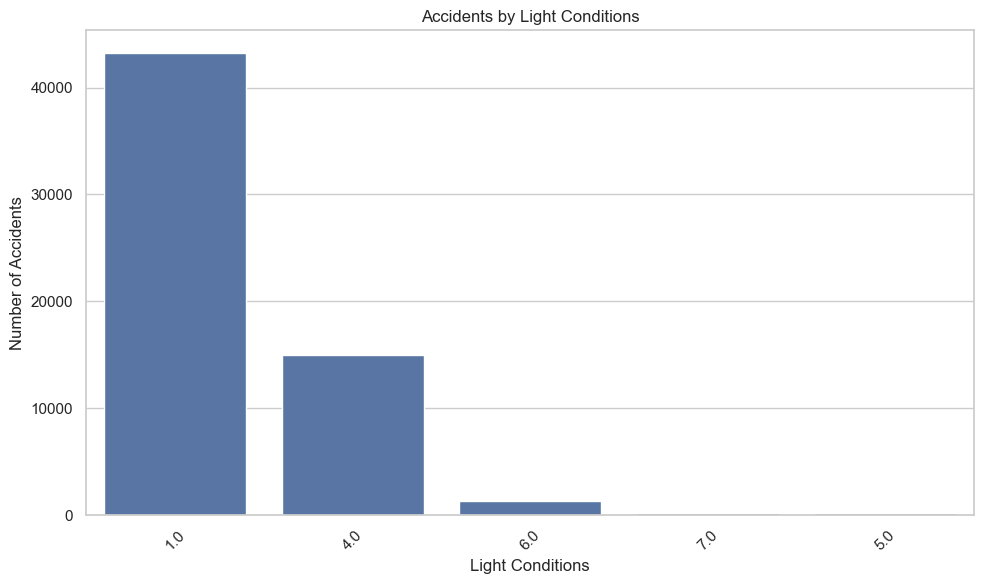

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Light_Conditions', order=df['Light_Conditions'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Accidents by Light Conditions')
plt.xlabel('Light Conditions')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()